# Result visualization

In [1]:
folder_path = "results/Llama 13B Results"
generation_path = f"{folder_path}/generation"

In [20]:
import os
import pandas as pd

# Create a list to store DataFrames for each generation
generation_data = []

# Indices
prompt_indices = {}
system_instruction_indices = {}
thinking_style_indices = {}

# Loop through files in the folder
file_list = sorted([file for file in os.listdir(generation_path) if file.endswith(".csv")], key=lambda x: int(x.split("_")[1].split(".")[0]))

prompt_index = 0
system_instruction_index = 0
thinking_style_index = 0
for file in file_list:
    file_path = os.path.join(generation_path, file)
    df = pd.read_csv(file_path)
    generation_data.append(df)
    
    # Extract and process prompts
    prompts = df['Gene'].apply(lambda x: exec(x)[0]).unique()
    for prompt in prompts:
        if prompt not in prompt_indices:
            prompt_indices[prompt] = prompt_index
            prompt_index += 1
            
    system_instructions = df['Gene'].apply(lambda x: exec(x)[1]).unique()
    for system_instruction in system_instructions:
        if system_instruction not in system_instruction_indices:
            system_instruction_indices[system_instruction] = system_instruction_index
            system_instruction_index += 1
            
    thinking_styles = df['Gene'].apply(lambda x: exec(x)[2]).unique()
    for thinking_style in thinking_styles:
        if thinking_style not in thinking_style_indices:
            thinking_style_indices[system_instruction] = thinking_style_index
            thinking_style_index += 1

TypeError: 'NoneType' object is not subscriptable

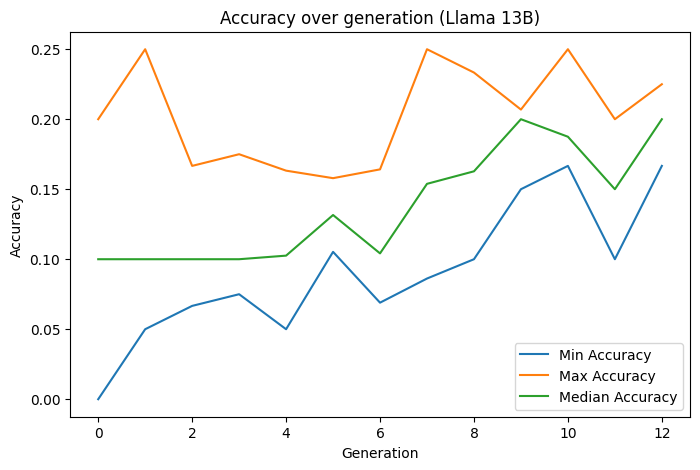

In [15]:
import matplotlib.pyplot as plt

# Create lists to store min, max, and median accuracy for each generation
min_accuracy = []
max_accuracy = []
median_accuracy = []

for df in generation_data:
    min_accuracy.append(df['Accuracy'][:5].min())
    max_accuracy.append(df['Accuracy'][:5].max())
    median_accuracy.append(df['Accuracy'][:5].median())

# Create a plot
generations = range(len(generation_data))
plt.figure(figsize=(8, 5))
plt.plot(generations, min_accuracy, label='Min Accuracy')
plt.plot(generations, max_accuracy, label='Max Accuracy')
plt.plot(generations, median_accuracy, label='Median Accuracy')

plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over generation (Llama 13B)')
plt.show()

In [21]:
# Create a list to store prompt indices for each row in the combined DataFrame
combined_df = pd.concat(generation_data, ignore_index=True)
combined_df['Prompt Index'] = combined_df['Gene'].apply(lambda x: prompt_indices[exec(x)[0]])
combined_df['System Instruction Index'] = combined_df['Gene'].apply(lambda x: system_instruction_indices[exec(x)[1]])
combined_df['Thinking Style Index'] = combined_df['Gene'].apply(lambda x: system_instruction_indices[exec(x)[2]])
combined_df['Number of examples'] = combined_df['Gene'].apply(lambda x: int(exec(x)[3]))

# Plot a histogram of prompt indices
plt.figure(figsize=(10, 6))
combined_df['Prompt Index'].plot(kind='hist', bins=current_index, rwidth=0.8)
plt.xlabel('Prompt Index')
plt.ylabel('Frequency')
plt.title('Frequency of Prompts (Indexed)')
plt.show()

TypeError: 'NoneType' object is not subscriptable